<a href="https://colab.research.google.com/github/easytikova/fakeittill/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Финальный проект по дисциплине "Основы программирования на Python"

Данный проект направлен на анализ датасета о пассажирах "Титаника" и нацелен на поиск возможной корреляции между различными переменными через инструменты визуализации.

In [4]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание не самых очевидных переменных:

**Age [возраст]**- возрастной показатель

**Pclass, Fare [пассажирский класс и цена купленного билета]** - показатели социально-экономического статуса

**SibSp, Parch [наличие братьев-сестер/родителей-детей на борту]** - показетели родственных связей между пассажирами


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


# Распределение числовых значений

По таблице ниже можно сказать следующее:



*   Данная выборка составляет меньше половины от реально числа пассажиров "Титаника" (их было 2224)
*   Выживание (Survived) - бинарная категория (1 - выжил, 0 - нет)



In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


the distribution of categorical features

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Анализ по ключевым данным

Есть значимая корреляция между 1-м пассажирским классом и выживаемостью. Меньшая, но также значительная корреляция есть и со вторым классом.

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


У женщины гораздо больший уровень выживания, чем у мужчин.

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Финансово-классовое положение также может иметь взаимосвязь с фактом выживания (это наблюдение особенно статистически значимо для пассажиров 1-го класса).

In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Интересно и то, что может прослеживаться и взаимосвязь между выживанием людей и их родственными связями.

In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Возраст - важен?

Гистограмма - инструмент, который подходит для визуализации составляющих одного множества - например, возраста.

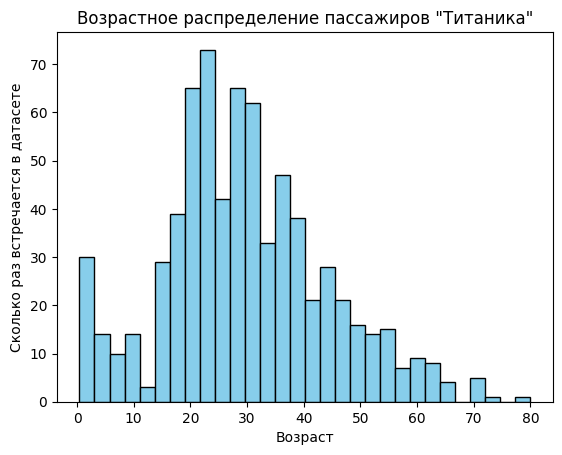

In [ ]:
import matplotlib.pyplot as plt

# гистограмма

plt.hist(train_df['Age'], bins=30, color='skyblue', edgecolor='black')

# подписать оси x, y и название гистограммы
plt.xlabel('Возраст')
plt.ylabel('Сколько раз встречается в датасете')
plt.title('Возрастное распределение пассажиров "Титаника"')

# отобразить
plt.show()

Данная гистограмма показывает, что:


*   Большая часть пассажиров - люди в возрасте от 15 до 40 лет
*   На борту также много младенцев и детей до 3-х лет
*   Меньше всего на борту пенсионеров (от 65 и выше)



## Кто смог, кто не смог

Гистограмма ниже демонстрирует два графика: сколько людей и какого возраста выжили (Survived = 1) и не выжили (Survived = 0) в катастрофе.  

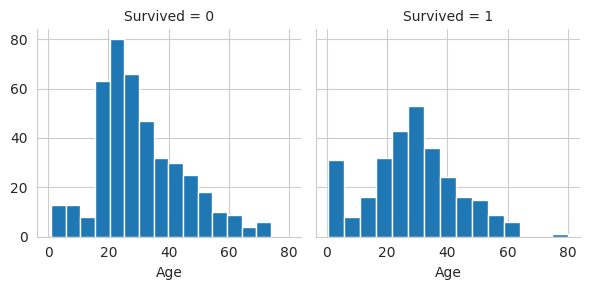

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
%matplotlib inline

gisto = sns.FacetGrid(train_df, col = 'Survived')
gisto.map(plt.hist, 'Age', bins = 15)

Можно сделать следующие выводы:


* Наиболее высока смертность молодежи (~ от 15 до 30 лет)
* Несмотря на это, выживаемость среди молодежи
* Самый старый пассажир "Титаника" смог выжить
* ...как и большинство младенцев


В целом, можно сказать, что возрастной показатель не коррелирует с фактом выживания - все возрастные группы имели те или иные шансы на спасение.

# Старые мужчины или молодые женщины: кто остался в живых?

Данные гистограммы показывают смертность (сверху) и выживаемость (снизу) среди мужчин (слева) и женщин (справа).

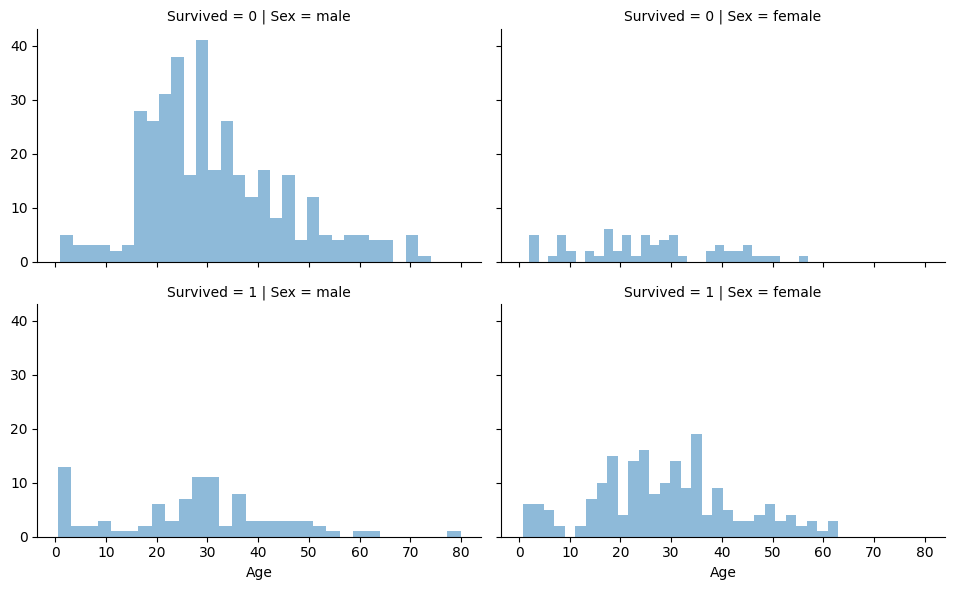

In [ ]:
grid = sns.FacetGrid(train_df, col = 'Sex', row = 'Survived', aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 30)
grid.add_legend();

Вывод по данной гистограмме:

*   Женщин выжило больше, чем мужчин
*   Среди мужчин наибольшие потери потерпели представители молодежи(в возрасте от 15 до 30 лет)
*   Наименьшие потери среди всех возрастных групп мужчин - у младенцев



# Пол и богатство

Посмотреть на характеристики выживших мужчин и женчин можно и под другим углом: с учётом их финансового положения. Графики ниже обрисовывают ситуацию с выживанием пассажиров разного пола и класса по портам, из которых они начали своё путешествие.


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  # Check for categorical plots without order information
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  "plot.".format(func.__name__))


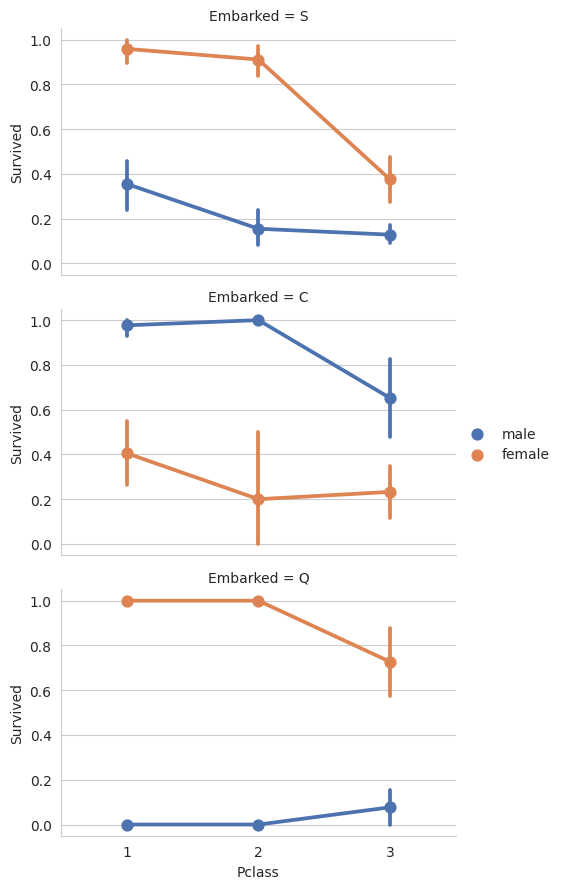

In [ ]:
grid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Отсюда видно, что:



*   Женщины те ещё живучие...осыби:)
*   Только в порту С выживаемость у мужчин выше - однако такие данные могут бть результатом корреляции между классом (не портом) и выживаемостью
*   Мужчины имели лучшую выживаемость в Pclass=3 по сравнению с Pclass=2 для портов C и Q


# Кто где был?

Боксплоты показывают, что данные в датасете нормально распределены и что есть некотрая зависимость класса приобретённого билета от возраста.


<Axes: xlabel='Pclass', ylabel='Age'>

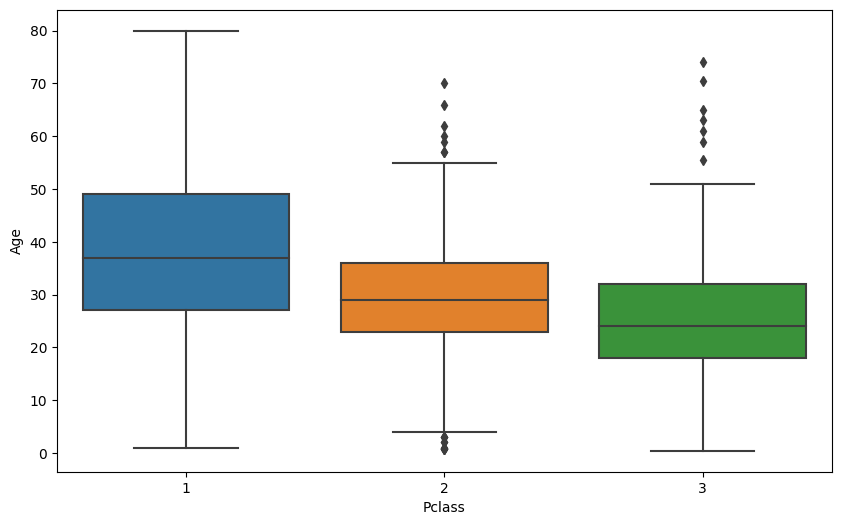

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train_df)



* В целом, можно сделать следующий вывод: чем люди старше, тем вероятнее они приобретут билет в первый пассажирский класс (среднему человеку здесь ~37 лет, во втором ~30 лет, в третьем ~25 лет). Тем не менее, в первом классе - встречаются представители всех возарстов.
*   Во втором и третьем пассажирском классе также есть пенсионеры, но их гораздо меньше, чем молодежи (они представлены как аутлаеры)



# Нужно ли было бы богатым (и женщиной), чтобы выжить на "Титанике"?

Коррелограмма ниже демонстрирует взаимозависимость всех параметров датасета.

<ipython-input-14-d91f3cef3aaf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


<Axes: >

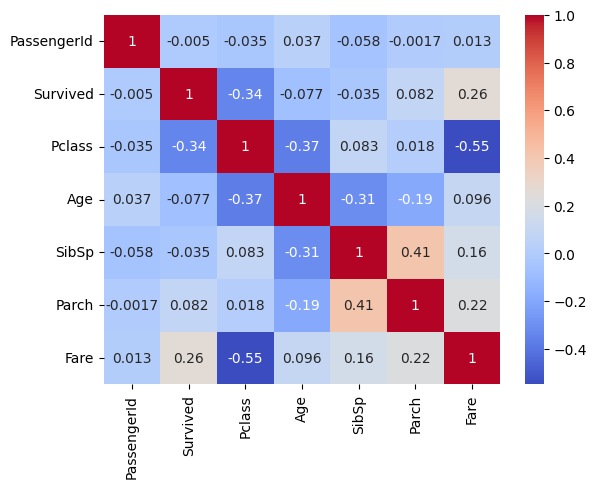

In [ ]:
correlation_matrix = train_df.corr()

sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm')



* Можно говорить о наличии слабой корреляции между фактом выжиывания и стоимостью купленного билета
* Есть корреляция между семейными отношениями и стоимостью купленных билетов
* В целом, на факт выживания не повлияли показатели родства, богатства, возраста и пола.


П.С. судьба - показатель однозначный.